# PHYS 2211L - Principles of Physics Laboratory I

## Simple Pendulum Laboratory

**Objective**. The objective of this laboratory is to experimentally determine the acceleration due to gravity using a simple pendulum.

**Theory**. 
* A simple pendulum consists of a mass connected to a pivot by a string. If the pendulum is placed in motion by pulling the mass to the side and releasing it, the pendulum will oscillate back and forth. The period of the pendulum is the amount of time required for the pendulum to complete a full oscillation; that is, the time to return to its release point. If the angle of release for the pendulum is small (less than 15 degrees from the vertical), the period is given by

>$$T = 2\pi \sqrt{{\dfrac{L}{g}}}$$

>where
>>$T$ is the period of the pendulum,   
$L$ is the length of pendulum, and  
$g$ is the acceleration due to gravity.

* If the period of the simple pendulum and its length are measured, the acceleration due to gravity can be determined using

>$$g = 4 {\pi}^2 \dfrac{L}{{T}^2}$$


**Apparatus and experimental procedures**.
* Equipment.
    1. Stop watch.
    2. Meter stick.
    3. String.
    4. Rods and clamps.
    5. Mass for pendulum bob.
    6. Protractor.
* Experimental setup. The experimental setup is shown in Figure 1 (provided by the student).
* Capabilities. To be provided by the student.


**Requirements**.
* In the laboratory (data tables are provided in Annex A).
    1. Measure the period of your simple pendulum five times.
    2. Measure the length of the pendulum (pivot to center of mass distance).
* In the classroom. Complete the following portions of the laboratory report.

**Para. 3. Apparatus and experimental procedures**.
1. Provide a figure showing the experimental setup.
2. Provide a description of the capabilities of the equipment used in the experiment.

**Para. 4. Data**.
1. Provide a copy of your original data for the experiment.
2. Provide a copy of your spreadsheet with calculations. Include the following:
     1.The period and uncertainty in the period of your simple pendulum.
    2. The acceleration due to gravity.
    3. The uncertainty in the acceleration due to gravity.
    4. The percent fractional error in the acceleration due to gravity.
    5. The percent discrepancy in the acceleration due to gravity. Use 9.800 m/s2 as the accepted value for the acceleration due to gravity.

**Para. 5. Results and Conclusions*.
1. Provide a statement of the acceleration due to gravity and its uncertainty.
2. Provide a statement of the percent fractional error in the experiment.
3. Provide a statement of the percent discrepancy in the experiment.
4. Provide a statement identifying the dominant type of error in the experiment.
5. Provide a statement identifying the measurement that produces the greatest amount of random error in the experiment.
6. Describe sources of systematic error in the experiment.
7. Describe sources of random error in the experiment.


_____

In [4]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#We use this to table data and results 
class ListTable(list):

    def _repr_html_(self):
        html = ["<table>"]
        for row in self:
            html.append("<tr>")
            
            for col in row:
                html.append("<td>{0}</td>".format(col))
            
            html.append("</tr>")
        html.append("</table>")
        return ''.join(html)

def degrees2radians(degrees):
    return np.pi*degrees/180.0

461


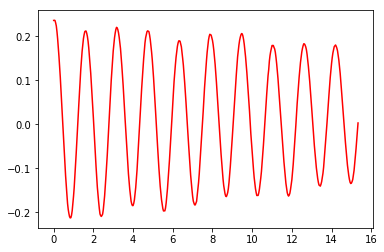

[0.23590861709609445, 0.23627223071778883, 0.23579930057443252, 0.23019810031605706, 0.2231212151352768, 0.2101833624992474, 0.1940476473983627, 0.17512478332331585, 0.15391220346663442, 0.1316842930445346, 0.10674966446441232, 0.07982057585573307, 0.050493329895338, 0.022643669143659454, -0.006063110614348859, -0.034881939654791916, -0.06397589301864229, -0.09011129243610937, -0.11660953672842979, -0.13971376600859886, -0.15975927454174946, -0.1803417326932367, -0.19368128536536144, -0.20288241310118543, -0.21013827322450704, -0.21301046007760108, -0.21262556333330107, -0.20668765119421165, -0.19664159052660685, -0.18132978849473305, -0.16410096328768178, -0.1444454785498602, -0.11974789025957079, -0.09611437467937517, -0.06738574008169362, -0.03830025217748368, -0.010966708582578704, 0.016130903031267487, 0.044873974821829206, 0.07168645038842004, 0.09945697499406841, 0.12502061875506779, 0.1452224487459716, 0.1657301643773966, 0.1811055855955619, 0.19444949013827625, 0.2033372508874

In [5]:

data = np.loadtxt('SimplePendulum3', skiprows = 2) # assuming you have time and step information in the first 2 lines 
                                      # and you do not want to read them

t=data[:,0]
x=data[:,1]
y=data[:,2]
N = len(t)
print (N)


angle = []

for i in range(0, N):
    a= math.atan(x[i]/y[i])
    angle.append(a)
    

plt.plot(t,angle, c='red')
plt.show()
print (angle)
import numpy, scipy.optimize

def fit_sin(tt, yy):
    '''Fit sin to the input time sequence, and return fitting parameters "amp", "omega", "phase", "offset", "freq", "period" and "fitfunc"'''
    tt = numpy.array(tt)
    yy = numpy.array(yy)
    ff = numpy.fft.fftfreq(len(tt), (tt[1]-tt[0]))   # assume uniform spacing
    Fyy = abs(numpy.fft.fft(yy))
    guess_freq = abs(ff[numpy.argmax(Fyy[1:])+1])   # excluding the zero frequency "peak", which is related to offset
    guess_amp = numpy.std(yy) * 2.**0.5
    guess_offset = numpy.mean(yy)
    guess = numpy.array([guess_amp, 2.*numpy.pi*guess_freq, 0., guess_offset])

    def sinfunc(t, A, w, p, c):  return A * numpy.sin(w*t + p) + c
    popt, pcov = scipy.optimize.curve_fit(sinfunc, tt, yy, p0=guess)
    A, w, p, c = popt
    f = w/(2.*numpy.pi)
    fitfunc = lambda t: A * numpy.sin(w*t + p) + c
    return {"amp": A, "omega": w, "phase": p, "offset": c, "freq": f, "period": 1./f, "fitfunc": fitfunc, "maxcov": numpy.max(pcov), "rawres": (guess,popt,pcov)}

r=fit_sin(t,x)
print (r)






In [6]:
L = 0.595 #in meters
g=4.0*np.pi*np.pi*L/1.5716/1.5716
DISC= ((g-9.8)/9.8*100) 
print (g, "m/s2", DISC, "%")


9.510265954868174 m/s2 -2.956469848283943 %
